In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
source_dir = 'road'
output_dir = 'contours'

In [3]:
images = [cv2.imread(os.path.join(source_dir, image)) for image in os.listdir(source_dir)]
hsv_images = [cv2.cvtColor(image, cv2.COLOR_BGR2HSV) for image in images]

ValueError: a must be 1-dimensional

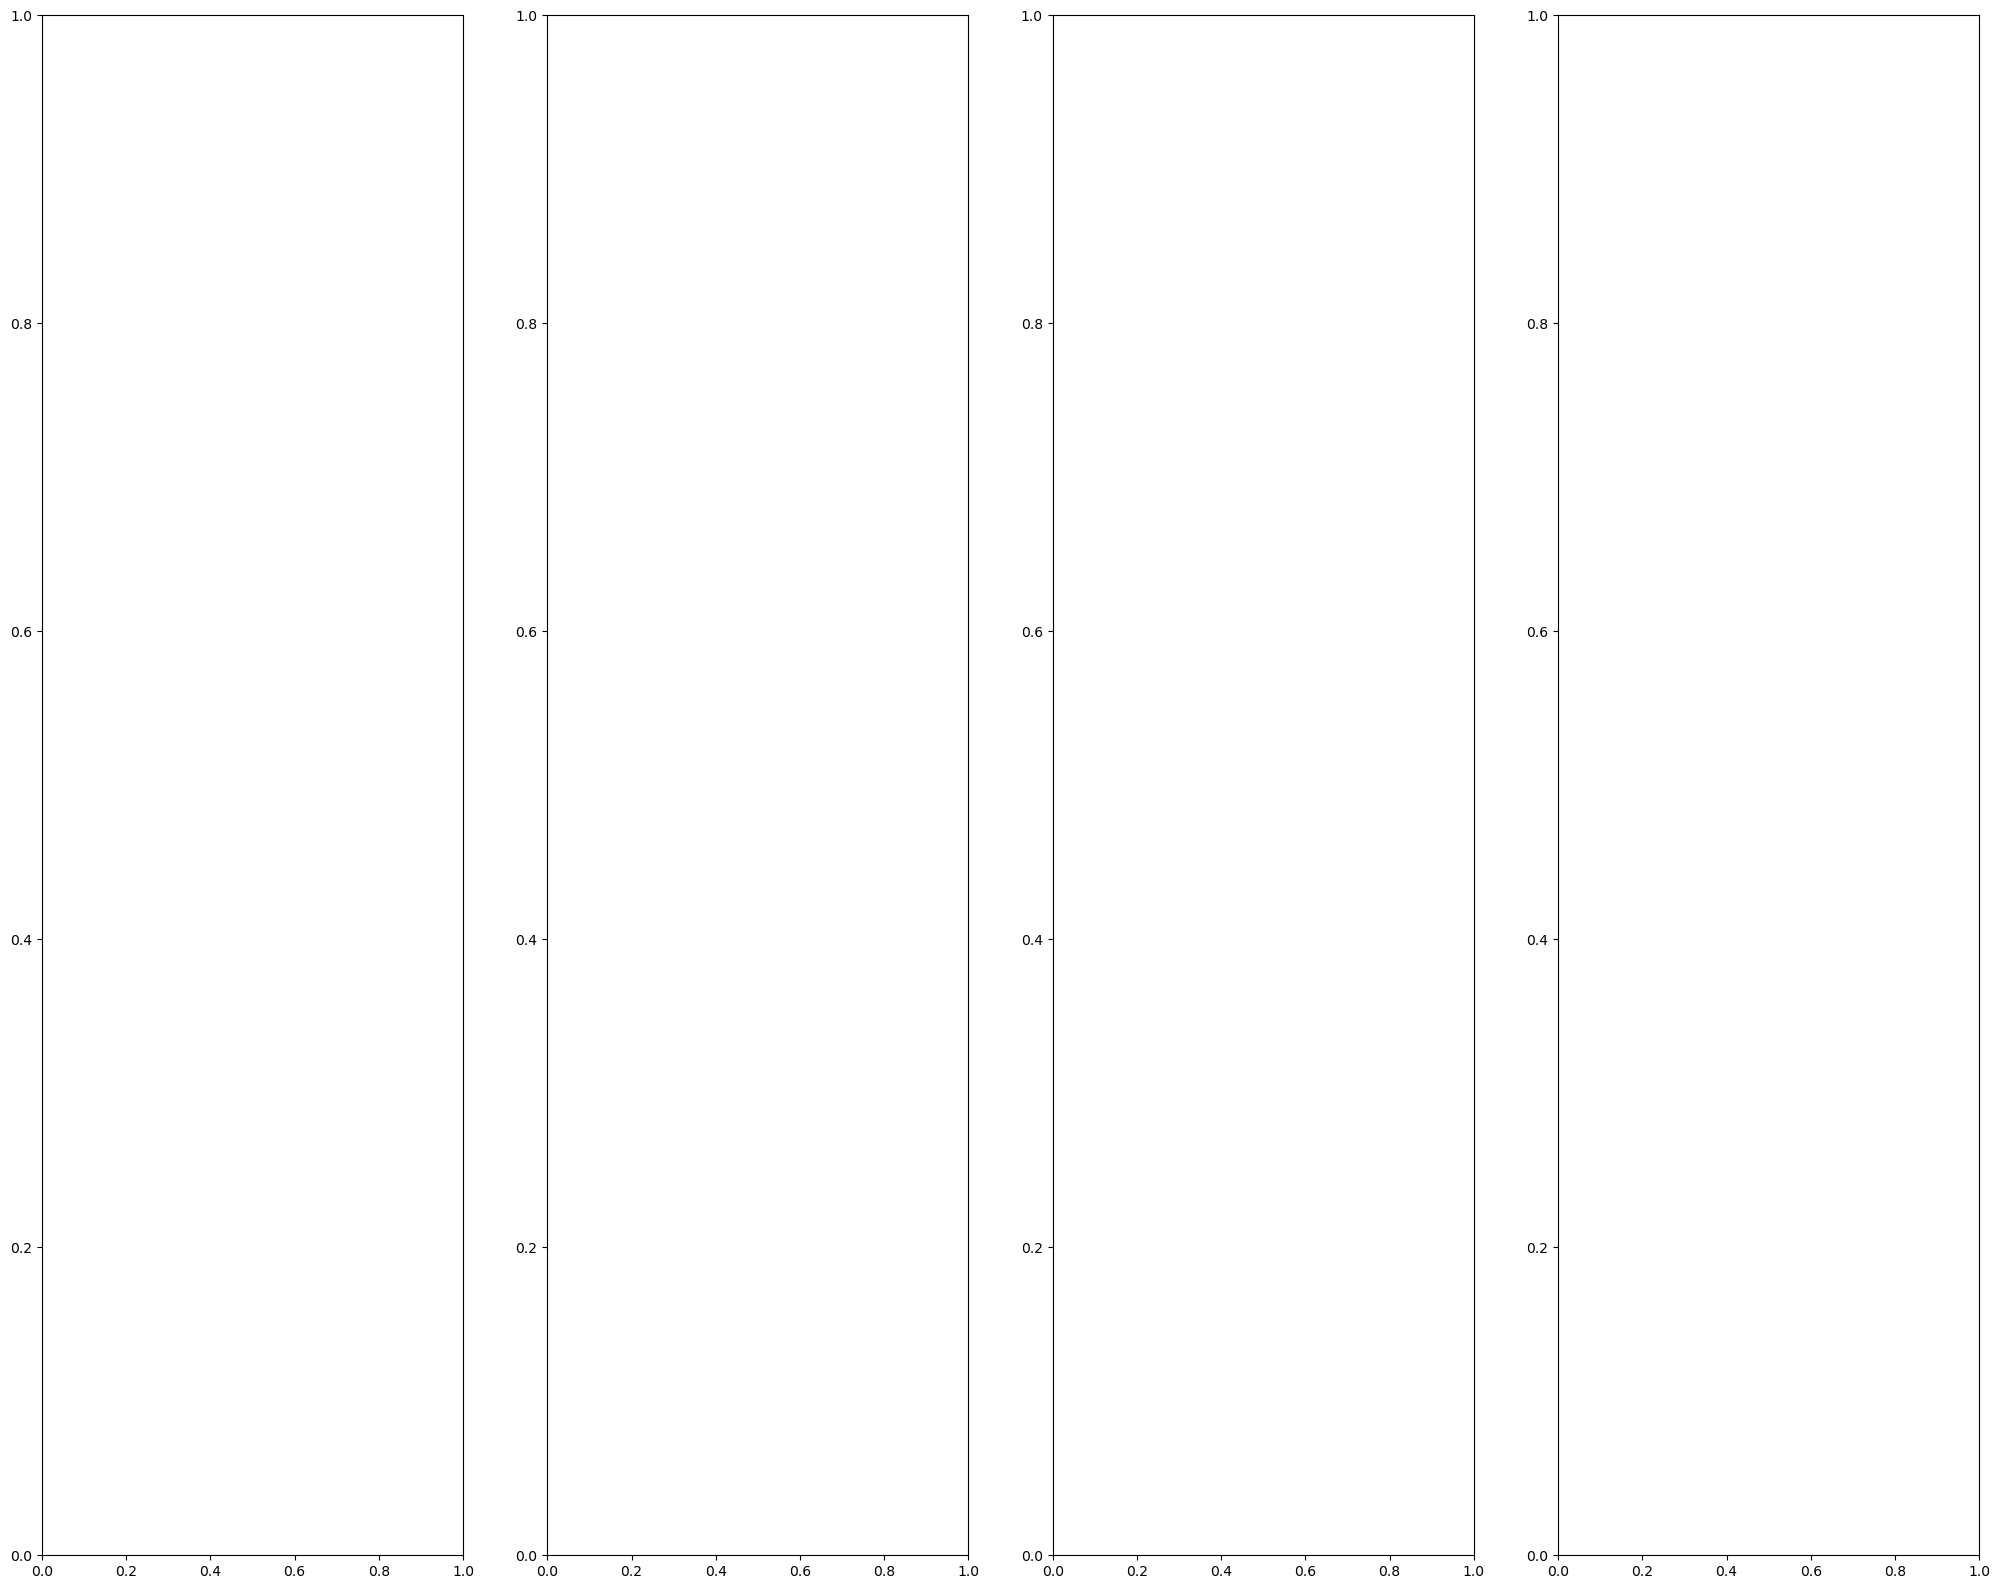

In [4]:
fig, axs = plt.subplots(1, 4, figsize = (25, 20))

for image, ax in zip(images, axs):
    ax.imshow(image)

plt.show()

In [ ]:
contours, hierarchy = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[1]

In [ ]:
start_id = np.where(contours[:, 0, 1][:-1] - contours[:, 0, 1][1:] < 0)[0][0]
end_id = np.where(contours[:, 0, 1][:-1] - contours[:, 0, 1][1:] < 0)[0][-1]

In [ ]:
end_id

519

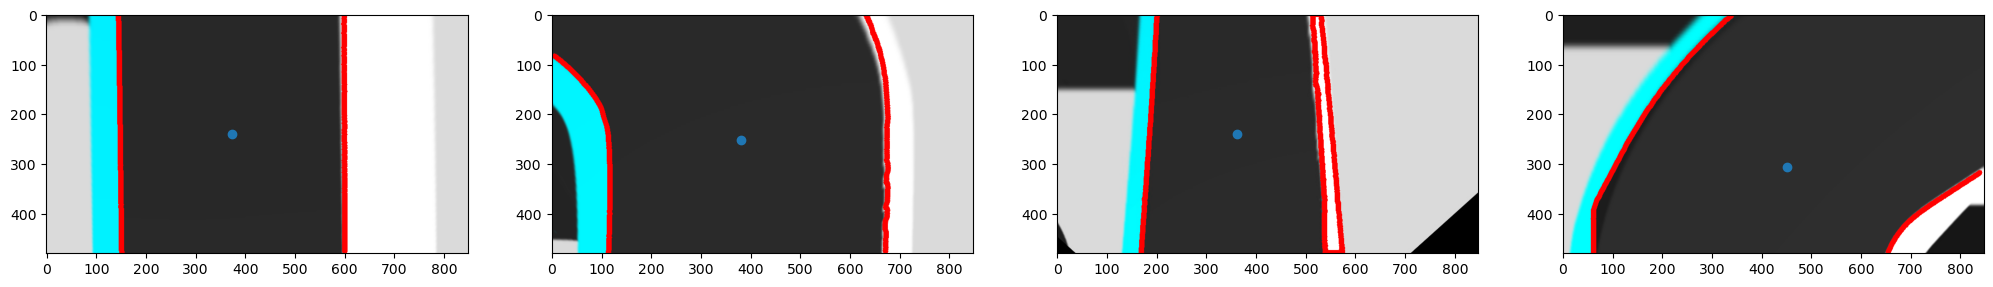

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (25, 20))

for i, hsv_image, image, img_name, ax in enumerate(zip(hsv_images, images, hsv_images, axs)):

    yellow_mask = cv2.inRange(hsv_image, (20, 100, 100),(30, 255, 255))
    white_mask = cv2.inRange(hsv_image, (0, 0, 255), (255, 0, 255))

    yellow_contour = np.zeros_like(yellow_mask)
    white_contour = np.zeros_like(white_mask)

    contours = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
    contours = contours[1] if len(contours) > 1 else contours[0]

    start_id = np.where(contours[:, 0, 1][:-1] - contours[:, 0, 1][1:] > 0)[0][0]
    end_id = np.where(contours[:, 0, 1][:-1] - contours[:, 0, 1][1:] > 0)[0][-2]
    cv2.drawContours(image, contours[start_id : end_id], -1, (255, 0, 0), 10)
    cv2.drawContours(yellow_contour, contours[start_id : end_id], -1, (255, 0, 0), 10)

    contours = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
    contours = contours[1] if len(contours) > 1 else contours[0]

    end_id = np.where(contours[:, 0, 1][:-1] - contours[:, 0, 1][1:] < 0)[0][-1]
    cv2.drawContours(image, contours[: end_id], -1, (255, 0, 0), 10)
    cv2.drawContours(white_contour, contours[: end_id], -1, (255, 0, 0), 10)

    M_yellow = cv2.moments(yellow_contour, binaryImage = True)
    M_white = cv2.moments(white_contour, binaryImage = True)

    yellow_center_x = 0 if M_yellow['m00'] == 0 else M_yellow['m10'] // M_yellow['m00']
    white_center_x = image.shape[1] if M_white['m00'] == 0 else M_white['m10'] // M_white['m00']

    yellow_center_y = 0 if M_yellow['m00'] == 0 else M_yellow['m01'] // M_yellow['m00']
    white_center_y = image.shape[0] if M_white['m00'] == 0 else M_white['m01'] // M_white['m00']

    if i < 4:
        ax.scatter([(yellow_center_x + white_center_x) / 2], [(yellow_center_y + white_center_y) / 2])
        ax.imshow(image)

    cv2.imwrite(os.path.join(output_dir, img_name), image)

plt.show()   